In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
path = '../ocean_data/MERGE.csv'
merged_df = pd.read_csv(path)
merged_df

,Country Name,2015 Total Pop,2016 Total Pop,2017 Total Pop,2018 Total Pop,2019 Total Pop,2015 Adults (%),2016 Adults (%),2017 Adults (%),2018 Adults (%),...,2015 Total Labor Force,2016 Total Labor Force,2017 Total Labor Force,2018 Total Labor Force,2019 Total Labor Force,2015 Happiness Score,2016 Happiness Score,2017 Happiness Score,2018 Happiness Score,2019 Happiness Score
0,Afghanistan,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,52.644299,53.207964,53.763223,54.324898,...,9176450.0,9566712.0,9947922.0,10334090.0,10699797.0,3.575,3.360,3.794,3.632,3.203
1,Albania,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,68.704725,68.660092,68.642614,68.582390,...,1289562.0,1302836.0,1316869.0,1318022.0,1313923.0,4.959,4.655,4.644,4.586,4.719
2,Argentina,43131966.0,43590368.0,44044811.0,44494502.0,44938712.0,64.060020,64.060567,64.083523,64.121277,...,19360544.0,19696452.0,20035267.0,20551682.0,20772672.0,6.574,6.650,6.599,6.388,6.086
3,Armenia,2925553.0,2936146.0,2944809.0,2951776.0,2957731.0,69.042571,68.761058,68.448966,68.112760,...,1334775.0,1310061.0,1303653.0,1303093.0,1303565.0,4.350,4.360,4.376,4.321,4.559
4,Australia,23815995.0,24190907.0,24601860.0,24982688.0,25364307.0,66.258049,65.906573,65.530942,65.152908,...,12585539.0,12742247.0,12989073.0,13254463.0,13414956.0,7.284,7.313,7.284,7.272,7.228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Uruguay,3412009.0,3424132.0,3436646.0,3449299.0,3461734.0,64.431718,64.466905,64.522742,64.577499,...,1749234.0,1750871.0,1748271.0,1749881.0,1762838.0,6.485,6.545,6.454,6.379,6.293
114,United States,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0,66.133389,65.942979,65.722106,65.483306,...,160596354.0,162547573.0,164268059.0,165483017.0,165890069.0,7.119,7.104,6.993,6.886,6.892
115,South Africa,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,65.679439,65.664420,65.630562,65.602506,...,21690077.0,22092829.0,22696993.0,22947458.0,23300226.0,4.642,4.459,4.829,4.724,4.722
116,Zambia,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0,51.758764,52.090970,52.503824,52.964181,...,6423437.0,6650519.0,6888188.0,7134980.0,7401485.0,5.129,4.795,4.514,4.377,4.107


In [3]:
list(merged_df.columns)

['Country Name',
 '2015 Total Pop',
 '2016 Total Pop',
 '2017 Total Pop',
 '2018 Total Pop',
 '2019 Total Pop',
 '2015 Adults (%)',
 '2016 Adults (%)',
 '2017 Adults (%)',
 '2018 Adults (%)',
 '2019 Adults (%)',
 '2015 Total Unemployment',
 '2016 Total Unemployment',
 '2017 Total Unemployment',
 '2018 Total Unemployment',
 '2019 Total Unemployment',
 '2015 Female Unemployment',
 '2016 Female Unemployment',
 '2017 Female Unemployment',
 '2018 Female Unemployment',
 '2019 Female Unemployment',
 '2015 Male Unemployment',
 '2016 Male Unemployment',
 '2017 Male Unemployment',
 '2018 Male Unemployment',
 '2019 Male Unemployment',
 '2015 Access to Electricity',
 '2016 Access to Electricity',
 '2017 Access to Electricity',
 '2018 Access to Electricity',
 '2015 Mortality (<5)',
 '2016 Mortality (<5)',
 '2017 Mortality (<5)',
 '2018 Mortality (<5)',
 '2019 Mortality (<5)',
 '2015 Female Life Expectancy',
 '2016 Female Life Expectancy',
 '2017 Female Life Expectancy',
 ' 2018 Female Life Expectan

# Total GDP and World Happiness Score

The correlation between total gdp and world happiness score in 2015 is 0.21.


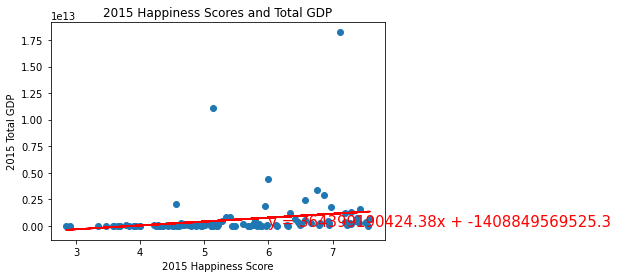

In [4]:
# 2015 Total GDP and World Happiness

gdp_2015 = merged_df.iloc[:, 48]
whs_2015 = merged_df.iloc[:, 58]
gdp_whs_2015 = st.pearsonr(gdp_2015, whs_2015)
print(f'The correlation between total gdp and world happiness score in 2015 is {round(gdp_whs_2015[0],2)}.')

x_gdp_2015 = merged_df['2015 Happiness Score']
y_gdp_2015 = merged_df['2015 Total GDP']
slope, intercept, rvalue, pvalue, stderr = linregress(x_gdp_2015, y_gdp_2015)
regressValues = x_gdp_2015 * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_gdp_2015, y_gdp_2015)
plt.plot(x_gdp_2015, regressValues,"r-")
plt.annotate(lineEq,(6,10),fontsize=15,color="red")
plt.xlabel('2015 Happiness Score')
plt.ylabel('2015 Total GDP')
plt.title('2015 Happiness Scores and Total GDP')
plt.show()

The correlation between total gdp and world happiness score in 2016 is 0.21.


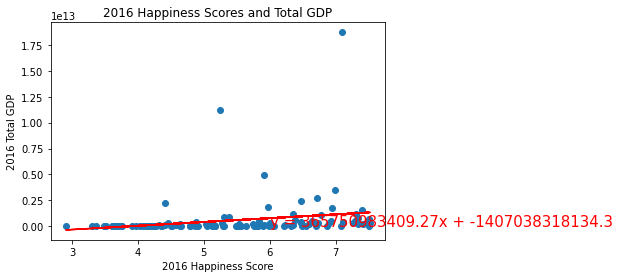

In [5]:
# 2016 Total GDP and World Happiness

gdp_2016 = merged_df.iloc[:, 49]
whs_2016 = merged_df.iloc[:, 59]
gdp_whs_2016 = st.pearsonr(gdp_2016, whs_2016)
print(f'The correlation between total gdp and world happiness score in 2016 is {round(gdp_whs_2016[0],2)}.')

x_gdp_2016 = merged_df['2016 Happiness Score']
y_gdp_2016 = merged_df['2016 Total GDP']
slope, intercept, rvalue, pvalue, stderr = linregress(x_gdp_2016, y_gdp_2016)
regressValues = x_gdp_2016 * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_gdp_2016, y_gdp_2016)
plt.plot(x_gdp_2016, regressValues,"r-")
plt.annotate(lineEq,(6,10),fontsize=15,color="red")
plt.xlabel('2016 Happiness Score')
plt.ylabel('2016 Total GDP')
plt.title('2016 Happiness Scores and Total GDP')
plt.show()

The correlation between total gdp and world happiness score in 2017 is 0.2.


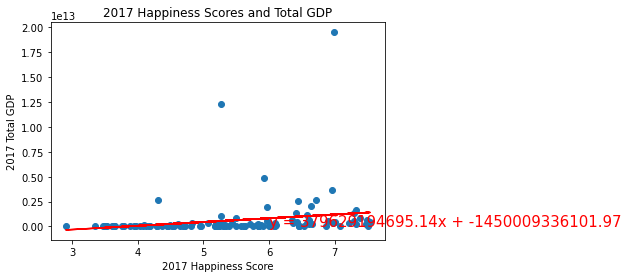

In [6]:
# 2017 Total GDP and World Happiness

gdp_2017 = merged_df.iloc[:, 50]
whs_2017 = merged_df.iloc[:, 60]
gdp_whs_2017 = st.pearsonr(gdp_2017, whs_2017)
print(f'The correlation between total gdp and world happiness score in 2017 is {round(gdp_whs_2017[0],2)}.')

x_gdp_2017 = merged_df['2017 Happiness Score']
y_gdp_2017 = merged_df['2017 Total GDP']
slope, intercept, rvalue, pvalue, stderr = linregress(x_gdp_2017, y_gdp_2017)
regressValues = x_gdp_2017 * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_gdp_2017, y_gdp_2017)
plt.plot(x_gdp_2017, regressValues,"r-")
plt.annotate(lineEq,(6,10),fontsize=15,color="red")
plt.xlabel('2017 Happiness Score')
plt.ylabel('2017 Total GDP')
plt.title('2017 Happiness Scores and Total GDP')
plt.show()

The correlation between total gdp and world happiness score in 2018 is 0.18.


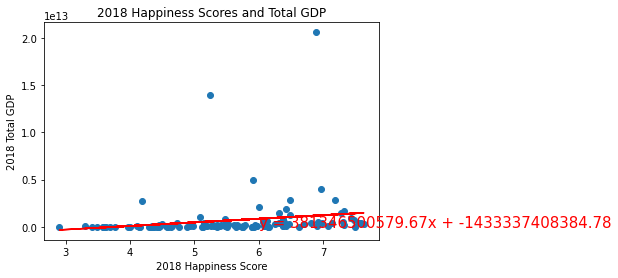

In [7]:
# 2018 Total GDP and World Happiness

gdp_2018 = merged_df.iloc[:, 51]
whs_2018 = merged_df.iloc[:, 61]
gdp_whs_2018 = st.pearsonr(gdp_2018, whs_2018)
print(f'The correlation between total gdp and world happiness score in 2018 is {round(gdp_whs_2018[0],2)}.')

x_gdp_2018 = merged_df['2018 Happiness Score']
y_gdp_2018 = merged_df['2018 Total GDP']
slope, intercept, rvalue, pvalue, stderr = linregress(x_gdp_2018, y_gdp_2018)
regressValues = x_gdp_2018 * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_gdp_2018, y_gdp_2018)
plt.plot(x_gdp_2018, regressValues,"r-")
plt.annotate(lineEq,(6,10),fontsize=15,color="red")
plt.xlabel('2018 Happiness Score')
plt.ylabel('2018 Total GDP')
plt.title('2018 Happiness Scores and Total GDP')
plt.show()

The correlation between total gdp and world happiness score in 2019 is 0.17.


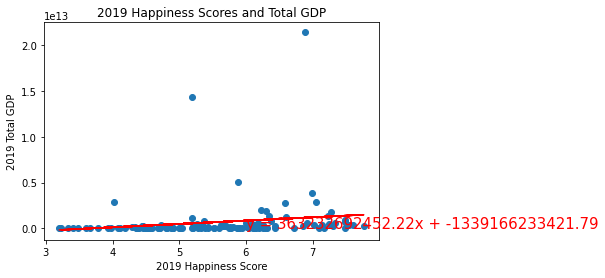

In [8]:
# 2019 Total GDP and World Happiness

gdp_2019 = merged_df.iloc[:, 52]
whs_2019 = merged_df.iloc[:, 62]
gdp_whs_2019 = st.pearsonr(gdp_2019, whs_2019)
print(f'The correlation between total gdp and world happiness score in 2019 is {round(gdp_whs_2019[0],2)}.')

x_gdp_2019 = merged_df['2019 Happiness Score']
y_gdp_2019 = merged_df['2019 Total GDP']
slope, intercept, rvalue, pvalue, stderr = linregress(x_gdp_2019, y_gdp_2019)
regressValues = x_gdp_2019 * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_gdp_2019, y_gdp_2019)
plt.plot(x_gdp_2019, regressValues,"r-")
plt.annotate(lineEq,(6,10),fontsize=15,color="red")
plt.xlabel('2019 Happiness Score')
plt.ylabel('2019 Total GDP')
plt.title('2019 Happiness Scores and Total GDP')
plt.show()

# Total Labor Force and World Happiness Score

The correlation between total labor force and world happiness score in 2015 is -0.02.


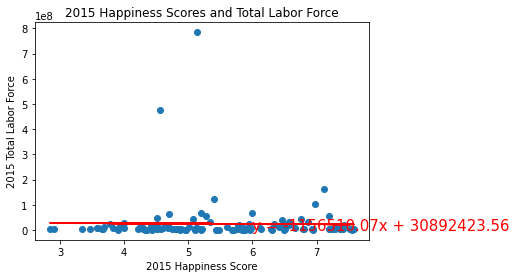

In [9]:
# 2015 Total Labor and World Happiness

labor_2015 = merged_df.iloc[:, 53]
whs_2015 = merged_df.iloc[:, 58]
labor_whs_2015 = st.pearsonr(labor_2015, whs_2015)
print(f'The correlation between total labor force and world happiness score in 2015 is {round(labor_whs_2015[0],2)}.')

x_labor_2015 = merged_df['2015 Happiness Score']
y_labor_2015 = merged_df['2015 Total Labor Force']
slope, intercept, rvalue, pvalue, stderr = linregress(x_labor_2015, y_labor_2015)
regressValues = x_labor_2015 * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_labor_2015, y_labor_2015)
plt.plot(x_labor_2015, regressValues,"r-")
plt.annotate(lineEq,(6,10),fontsize=15,color="red")
plt.xlabel('2015 Happiness Score')
plt.ylabel('2015 Total Labor Force')
plt.title('2015 Happiness Scores and Total Labor Force')
plt.show()

The correlation between total labor force and world happiness score in 2016 is -0.02.


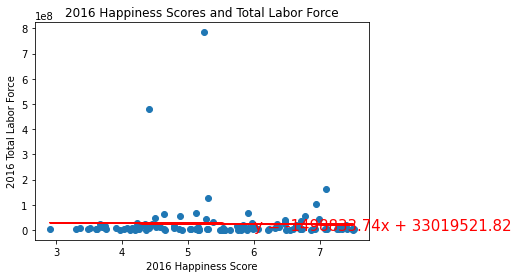

In [10]:
# 2016 Total Labor and World Happiness

labor_2016 = merged_df.iloc[:, 54]
whs_2016 = merged_df.iloc[:, 59]
labor_whs_2016 = st.pearsonr(labor_2016, whs_2016)
print(f'The correlation between total labor force and world happiness score in 2016 is {round(labor_whs_2016[0],2)}.')

x_labor_2016 = merged_df['2016 Happiness Score']
y_labor_2016 = merged_df['2016 Total Labor Force']
slope, intercept, rvalue, pvalue, stderr = linregress(x_labor_2016, y_labor_2016)
regressValues = x_labor_2016 * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_labor_2016, y_labor_2016)
plt.plot(x_labor_2016, regressValues,"r-")
plt.annotate(lineEq,(6,10),fontsize=15,color="red")
plt.xlabel('2016 Happiness Score')
plt.ylabel('2016 Total Labor Force')
plt.title('2016 Happiness Scores and Total Labor Force')
plt.show()

The correlation between total labor force and world happiness score in 2017 is -0.03.


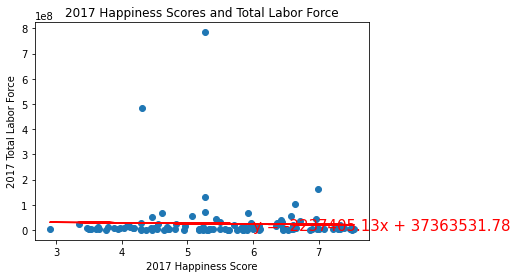

In [11]:
# 2017 Total Labor and World Happiness

labor_2017 = merged_df.iloc[:, 55]
whs_2017 = merged_df.iloc[:, 60]
labor_whs_2017 = st.pearsonr(labor_2017, whs_2017)
print(f'The correlation between total labor force and world happiness score in 2017 is {round(labor_whs_2017[0],2)}.')

x_labor_2017 = merged_df['2017 Happiness Score']
y_labor_2017 = merged_df['2017 Total Labor Force']
slope, intercept, rvalue, pvalue, stderr = linregress(x_labor_2017, y_labor_2017)
regressValues = x_labor_2017 * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_labor_2017, y_labor_2017)
plt.plot(x_labor_2017, regressValues,"r-")
plt.annotate(lineEq,(6,10),fontsize=15,color="red")
plt.xlabel('2017 Happiness Score')
plt.ylabel('2017 Total Labor Force')
plt.title('2017 Happiness Scores and Total Labor Force')
plt.show()

The correlation between total labor force and world happiness score in 2018 is -0.05.


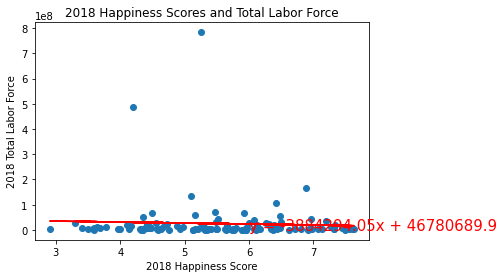

In [12]:
# 2018 Total Labor and World Happiness

labor_2018 = merged_df.iloc[:, 56]
whs_2018 = merged_df.iloc[:, 61]
labor_whs_2018 = st.pearsonr(labor_2018, whs_2018)
print(f'The correlation between total labor force and world happiness score in 2018 is {round(labor_whs_2018[0],2)}.')

x_labor_2018 = merged_df['2018 Happiness Score']
y_labor_2018 = merged_df['2018 Total Labor Force']
slope, intercept, rvalue, pvalue, stderr = linregress(x_labor_2018, y_labor_2018)
regressValues = x_labor_2018 * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_labor_2018, y_labor_2018)
plt.plot(x_labor_2018, regressValues,"r-")
plt.annotate(lineEq,(6,10),fontsize=15,color="red")
plt.xlabel('2018 Happiness Score')
plt.ylabel('2018 Total Labor Force')
plt.title('2018 Happiness Scores and Total Labor Force')
plt.show()

The correlation between total labor force and world happiness score in 2019 is -0.07.


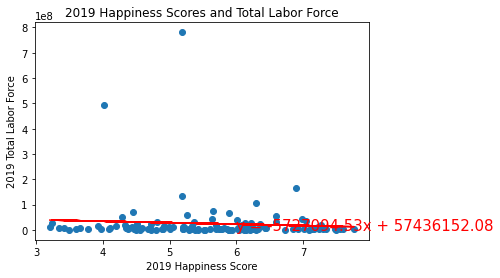

In [13]:
# 2019 Total Labor and World Happiness

labor_2019 = merged_df.iloc[:, 57]
whs_2019 = merged_df.iloc[:, 62]
labor_whs_2019 = st.pearsonr(labor_2019, whs_2019)
print(f'The correlation between total labor force and world happiness score in 2019 is {round(labor_whs_2019[0],2)}.')

x_labor_2019 = merged_df['2019 Happiness Score']
y_labor_2019 = merged_df['2019 Total Labor Force']
slope, intercept, rvalue, pvalue, stderr = linregress(x_labor_2019, y_labor_2019)
regressValues = x_labor_2019 * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_labor_2019, y_labor_2019)
plt.plot(x_labor_2019, regressValues,"r-")
plt.annotate(lineEq,(6,10),fontsize=15,color="red")
plt.xlabel('2019 Happiness Score')
plt.ylabel('2019 Total Labor Force')
plt.title('2019 Happiness Scores and Total Labor Force')
plt.show()